# IN3050/IN4050 Mandatory Assignment 3: Unsupervised Learning


**Name:** Eduard Antonovic Occhipinti

**Username:** eduardao


### Rules

Before you begin the exercise, review the rules at this website: https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html , in particular the paragraph on cooperation. This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers with others. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo" https://www.uio.no/english/about/regulations/studies/studies-examinations/routines-cheating.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, April 21, 2023, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.


### Goals of the exercise

This exercise has three parts. The first part is focused on Principal Component Analysis (PCA). You will go through some basic theory, and implent PCA from scratch to do compression and visualization of data.

The second part focuses on clustering using K-means. You will use `scikit-learn` to run K-means clustering, and use PCA to visualize the results.

The last part ties supervised and unsupervised learning together in an effort to evaluate the output of K-means using a logistic regression for multi-class classification approach.

The master students will also have to do one extra part about tuning PCA to balance compression with information lost.

### Tools

You may freely use code from the weekly exercises and the published solutions. In the first part about PCA you may **NOT** use ML libraries like `scikit-learn`. In the K-means part and beyond we encurage the use of `scikit-learn` to iterate quickly on the problems.

### Beware

This is a new assignment. There might occur typos or ambiguities. If anything is unclear, do not hesitate to ask. Also, if you think some assumptions are missing, make your
own and explain them!


# Principal Component Analysis (PCA)

In this section, you will work with the PCA algorithm in order to understand its definition and explore its uses.


## Implementation: how is PCA implemented?

Here we implement the basic steps of PCA and we assemble them.


### Importing libraries

We start importing the _numpy_ library for performing matrix computations, the _pyplot_ library for plotting data, and the _syntheticdata_ module to import synthetic data.


In [59]:
import numpy as np
import matplotlib.pyplot as plt

import syntheticdata

### Centering the Data

Implement a function with the following signature to center the data as explained in _Marsland_.


In [60]:
def center_data(A):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # X    [NxM] numpy centered data matrix (N samples, M features)
    return A - np.mean(A, axis=0)

Test your function checking the following assertion on _testcase_:


In [61]:
testcase = np.array(
    [[3.0, 11.0, 4.3], [4.0, 5.0, 4.3], [5.0, 17.0, 4.5], [4, 13.0, 4.4]]
)
answer = np.array(
    [[-1.0, -0.5, -0.075], [0.0, -6.5, -0.075],
        [1.0, 5.5, 0.125], [0.0, 1.5, 0.025]]
)
np.testing.assert_array_almost_equal(center_data(testcase), answer)


### Computing Covariance Matrix

Implement a function with the following signature to compute the covariance matrix as explained in _Marsland_.


In [62]:
def compute_covariance_matrix(A):
    # INPUT:
    # A    [NxM] centered numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # C    [MxM] numpy covariance matrix (M features, M features)
    #
    # Do not apply centering here. We assume that A is centered before this function is called.

    C = np.dot(A.T, A) / (A.shape[0] - 1)

    return C


Test your function checking the following assertion on _testcase_:


In [63]:
testcase = center_data(
    np.array([[22.0, 11.0, 5.5], [10.0, 5.0, 2.5],
             [34.0, 17.0, 8.5], [28.0, 14.0, 7]])
)
answer = np.array(
    [[580.0, 290.0, 145.0], [290.0, 145.0, 72.5], [145.0, 72.5, 36.25]])

# Depending on implementation the scale can be different:
to_test = compute_covariance_matrix(testcase)

answer = answer / answer[0, 0]
to_test = to_test / to_test[0, 0]

np.testing.assert_array_almost_equal(to_test, answer)


### Computing eigenvalues and eigenvectors

Use the linear algebra package of `numpy` and its function `np.linalg.eig()` to compute eigenvalues and eigenvectors. Notice that we take the real part of the eigenvectors and eigenvalues. The covriance matrix _should_ be a symmetric matrix, but the actual implementation in `compute_covariance_matrix()` can lead to small round off errors that lead to tiny imaginary additions to the eigenvalues and eigenvectors. These are purely numerical artifacts that we can safely remove.

**Note:** If you decide to NOT use `np.linalg.eig()` you must make sure that the eigenvalues you compute are of unit lenght!


In [64]:
def compute_eigenvalue_eigenvectors(A):
    # INPUT:
    # A    [DxD] numpy matrix
    #
    # OUTPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors

    eigval, eigvec = np.linalg.eig(A)

    # Numerical roundoff can lead to (tiny) imaginary parts. We correct that here.
    eigval = eigval.real
    eigvec = eigvec.real

    return eigval, eigvec


Test your function checking the following assertion on _testcase_:


In [65]:
testcase = np.array([[2, 0, 0], [0, 5, 0], [0, 0, 3]])
answer1 = np.array([2.0, 5.0, 3.0])
answer2 = np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
x, y = compute_eigenvalue_eigenvectors(testcase)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)


### Sorting eigenvalues and eigenvectors

Implement a function with the following signature to sort eigenvalues and eigenvectors as explained in _Marsland_.

Remember that eigenvalue _eigval[i]_ corresponds to eigenvector _eigvec[:,i]_.


In [66]:
def sort_eigenvalue_eigenvectors(eigval, eigvec):
    # INPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    #
    # OUTPUT:
    # sorted_eigval    [D] numpy vector of eigenvalues
    # sorted_eigvec    [DxD] numpy array of eigenvectors

    sorted_eigval = np.sort(eigval)[::-1]
    sorted_eigvec = eigvec[:, eigval.argsort()[::-1]]

    return sorted_eigval, sorted_eigvec


Test your function checking the following assertion on _testcase_:


In [67]:
testcase = np.array([[2, 0, 0], [0, 5, 0], [0, 0, 3]])
answer1 = np.array([5.0, 3.0, 2.0])
answer2 = np.array([[0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0]])
x, y = compute_eigenvalue_eigenvectors(testcase)
x, y = sort_eigenvalue_eigenvectors(x, y)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)


### PCA Algorithm

Implement a function with the following signature to compute PCA as explained in _Marsland_ using the functions implemented above.


In [68]:
def pca(A, m):
    """
    Takes as input a data matrix A (with N samples and M features) and a
    number of features m (with m <= M) and returns the eigenvectors and the PCA data matrix.

    Returns:
        pca_eigvec: [Mxm] numpy matrix containing the eigenvectors (M dimensions, m eigenvectors)
        P: [Nxm] numpy PCA data matrix (N samples, m features)
    """

    A = center_data(A)

    pca_eigvec = sort_eigenvalue_eigenvectors(
        *compute_eigenvalue_eigenvectors(compute_covariance_matrix(A))
    )[1][:, :m]

    P = np.dot(pca_eigvec, A)

    return pca_eigvec, P

Test your function checking the following assertion on _testcase_:


In [69]:
import pickle

testcase = np.array([[22.0, 11.0, 5.5], [10.0, 5.0, 2.5], [34.0, 17.0, 8.5]])
x, y = pca(testcase, 2)


answer1_file = open("PCAanswer1.pkl", "rb")
answer2_file = open("PCAanswer2.pkl", "rb")
answer1 = pickle.load(answer1_file)
answer2 = pickle.load(answer2_file)

test_arr_x = np.sum(np.abs(np.abs(x) - np.abs(answer1)), axis=0)
np.testing.assert_array_almost_equal(test_arr_x, np.zeros(2))

test_arr_y = np.sum(np.abs(np.abs(y) - np.abs(answer2)))
np.testing.assert_almost_equal(test_arr_y, 0)

## Understanding: how does PCA work?

We now use the PCA algorithm you implemented on a toy data set in order to understand its inner workings.


### Loading the data

The module _syntheticdata_ provides a small synthetic dataset of dimension [100x2] (100 samples, 2 features).


In [70]:
X = syntheticdata.get_synthetic_data1()

### Visualizing the data

Visualize the synthetic data using the function _scatter()_ from the _matplotlib_ library.


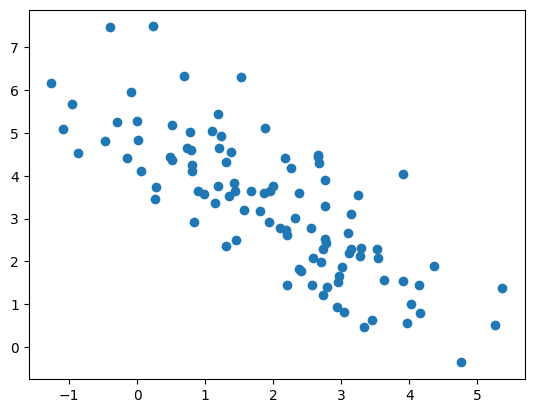

In [71]:
plt.scatter(X[:, 0], X[:, 1])


### Visualize the centered data

Notice that the data visualized above is not centered on the origin (0,0). Use the function defined above to center the data, and the replot it.


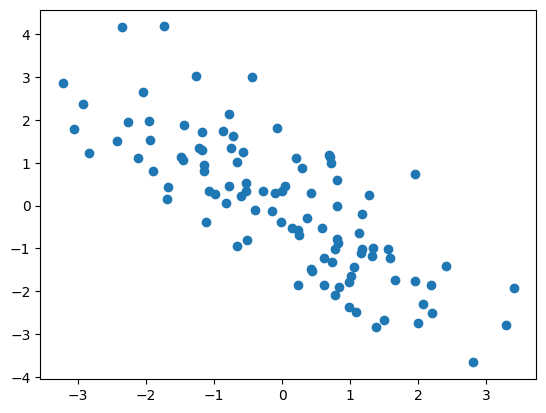

In [72]:
X = center_data(X)
plt.scatter(X[:, 0], X[:, 1])


### Visualize the first eigenvector

Visualize the vector defined by the first eigenvector.
To do this you need:

- Use the _PCA()_ function to recover the eigenvectors
- Plot the centered data as done above
- The first eigenvector is a 2D vector (x0,y0). This defines a vector with origin in (0,0) and head in (x0,y0). Use the function _plot()_ from matplotlib to plot a line over the first eigenvector.


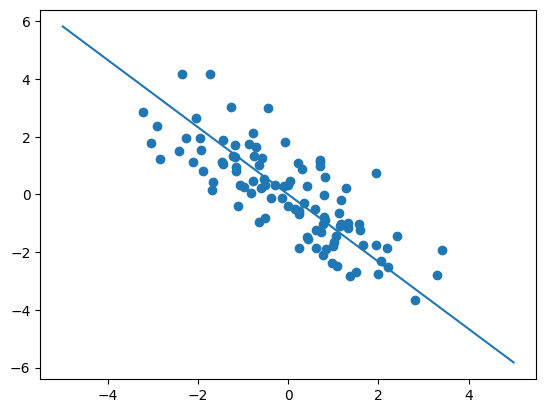

In [73]:
pca_eigvec, _ = pca(X, 1)
first_eigvec = pca_eigvec[:, 0]

plt.scatter(X[:, 0], X[:, 1])

x = np.linspace(-5, 5, 1000)
y = first_eigvec[1] / first_eigvec[0] * x
plt.plot(x, y)


### Visualize the PCA projection

Finally, use the _PCA()_ algorithm to project on a single dimension and visualize the result using again the _scatter()_ function.


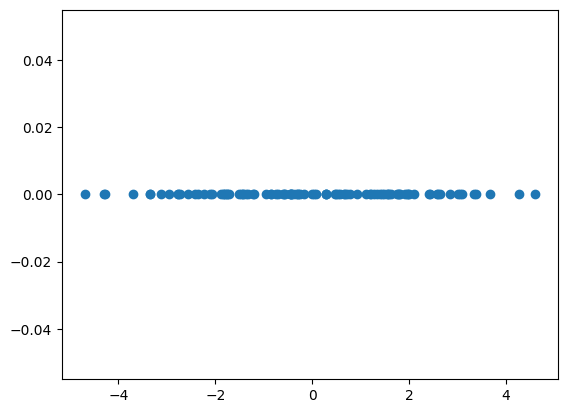

In [74]:
_, P = pca(X, 1)
plt.scatter(P[:, 0], np.zeros(P.shape[0]))

## Evaluation: when are the results of PCA sensible?

So far we have used PCA on synthetic data. Let us now imagine we are using PCA as a pre-processing step before a classification task. This is a common setup with high-dimensional data. We explore when the use of PCA is sensible.


### Loading the first set of labels

The function _get_synthetic_data_with_labels1()_ from the module _syntethicdata_ provides a first labeled dataset.


In [75]:
X, y = syntheticdata.get_synthetic_data_with_labels1()

### Running PCA

Process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using _scatter()_ before and after running PCA. Comment on the results.


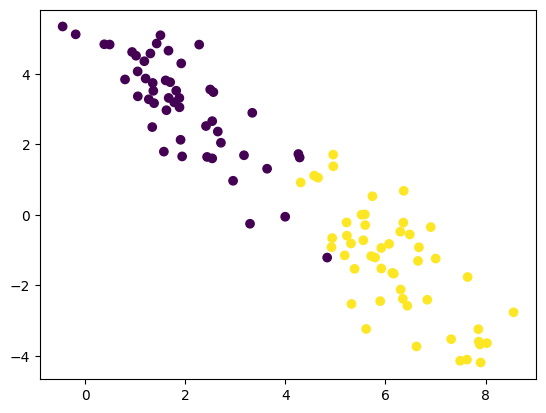

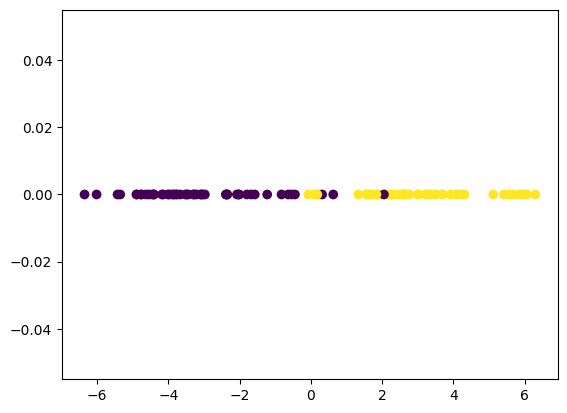

In [76]:
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0])

plt.figure()
_, P = pca(X, 2)

plt.scatter(P[:, 0], np.zeros(P.shape[0]), c=y[:, 0])

**Comment:** We can see that reducing the dimensionality of the data gives a good separation of the two classes.


### Loading the second set of labels

The function _get_synthetic_data_with_labels2()_ from the module _syntethicdata_ provides a second labeled dataset.


In [77]:
X, y = syntheticdata.get_synthetic_data_with_labels2()


### Running PCA

As before, process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using _scatter()_ before and after running PCA. Comment on the results.


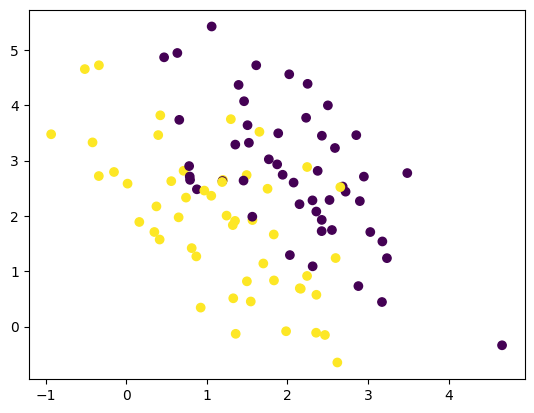

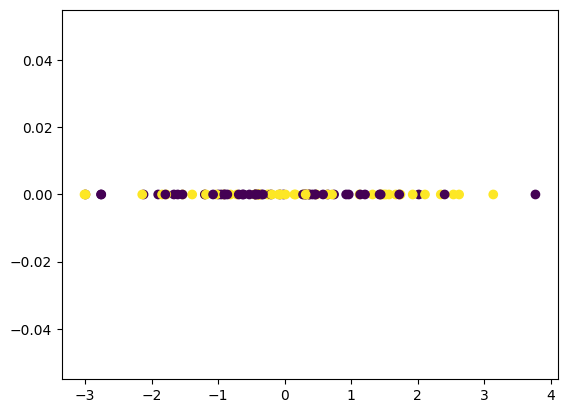

In [78]:
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0])

plt.figure()
_, P = pca(X, 2)
plt.scatter(P[:, 0], np.zeros(P.shape[0]), c=y[:, 0])

**Comment:** In this case the separation is not good, to reduce the dimensionality of the problem we could change the base of the data as if it was in a plane described by the vectors [1,1] and [-1,1]


How would the result change if you were to consider the second eigenvector? Or if you were to consider both eigenvectors?


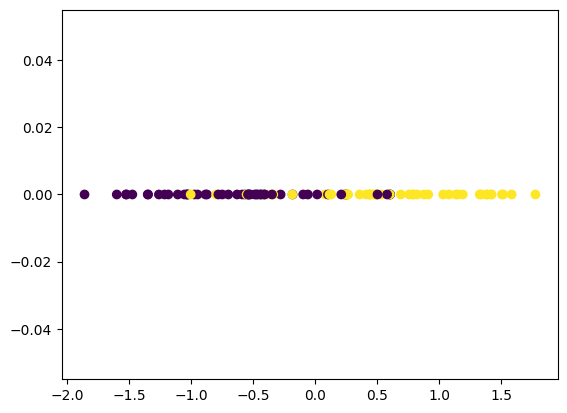

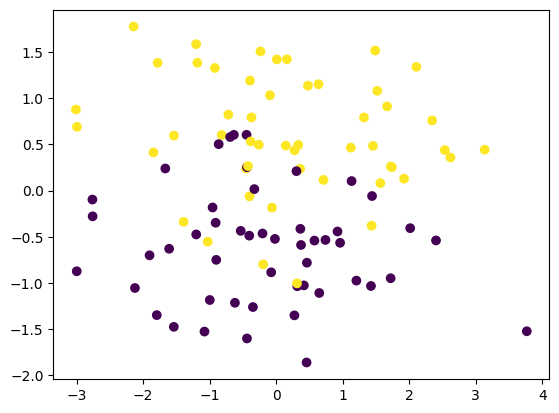

In [79]:
plt.scatter(P[:, 1], np.zeros(P.shape[0]), c=y[:, 0])
plt.show()

plt.scatter(P[:, 0], P[:, 1], c=y[:, 0])
plt.show()


**Answer**: When plotting the second eigenvector against the first one we see that the data is approximately linearly separable.


## Case study 1: PCA for visualization

We now consider the _iris_ dataset, a simple collection of data (N=150) describing iris flowers with four (M=4) features. The features are: Sepal Length, Sepal Width, Petal Length and Petal Width. Each sample has a label, identifying each flower as one of 3 possible types of iris: Setosa, Versicolour, and Virginica.

Visualizing a 4-dimensional dataset is impossible; therefore we will use PCA to project our data in 2 dimensions and visualize it.


### Loading the data

The function _get_iris_data()_ from the module _syntethicdata_ returns the _iris_ dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].


In [80]:
X, y = syntheticdata.get_iris_data()


### Visualizing the data by selecting features

Try to visualize the data (using label information) by randomly selecting two out of the four features of the data. You may try different pairs of features.


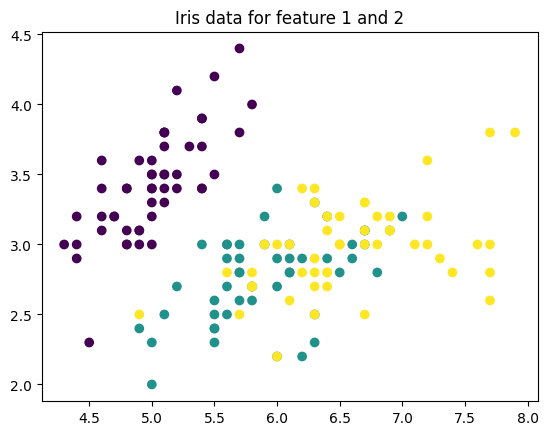

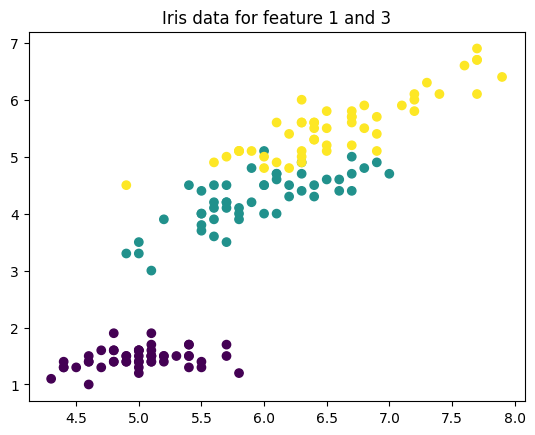

In [81]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Iris data for feature 1 and 2")
plt.show()

plt.scatter(X[:, 0], X[:, 2], c=y)
plt.title("Iris data for feature 1 and 3")
plt.show()


### Visualizing the data by PCA

Process the data using PCA and visualize it (using label information). Compare with the previous visualization and comment on the results.


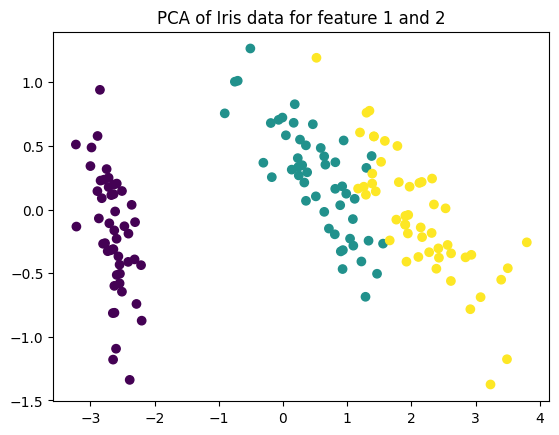

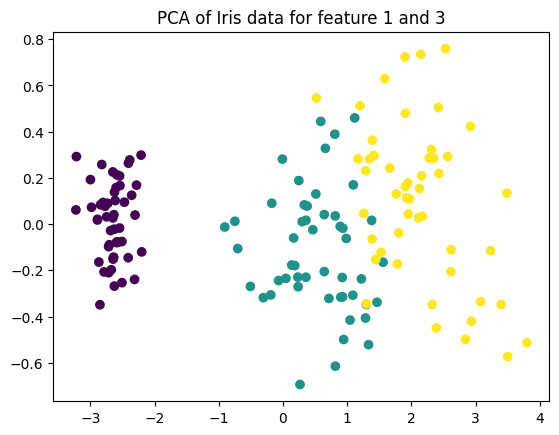

In [82]:
_, P = pca(X, 4)

plt.title("PCA of Iris data for feature 1 and 2")
plt.scatter(P[:, 0], P[:, 1], c=y)
plt.show()

plt.title("PCA of Iris data for feature 1 and 3")
plt.scatter(P[:, 0], P[:, 2], c=y)
plt.show()

**Comment:** When visualizing the PCA data we can see that it's easy to separate the data using the first and second eigenvectors.


## Case study 2: PCA for compression

We now consider the _faces in the wild (lfw)_ dataset, a collection of pictures (N=1280) of people. Each pixel in the image is a feature (M=2914).


### Loading the data

The function _get_lfw_data()_ from the module _syntethicdata_ returns the _lfw_ dataset. It returns a data matrix of dimension [1280x2914] and a label vector of dimension [1280]. It also returns two parameters, $h$ and $w$, reporting the height and the width of the images (these parameters are necessary to plot the data samples as images). Beware, it might take some time to download the data. Be patient :)


In [83]:
X, y, h, w = syntheticdata.get_lfw_data()


### Inspecting the data

Choose one datapoint to visualize (first coordinate of the matrix $X$) and use the function [imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) to plot and inspect some of the pictures.

Notice that _imshow_ receives as a first argument an image to be plot; the image must be provided as a rectangular matrix, therefore we reshape a sample from the matrix $X$ to have height $h$ and width $w$. The parameter _cmap_ specifies the color coding; in our case we will visualize the image in black-and-white with different gradations of grey.


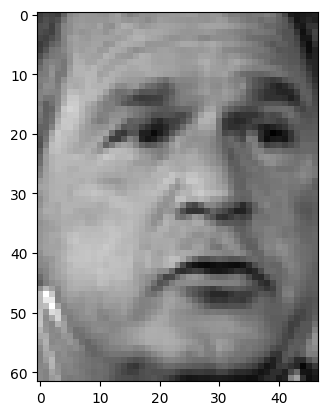

In [84]:
plt.imshow(X[0, :].reshape((h, w)), cmap=plt.cm.gray)


### Implementing a compression-decompression function

Implement a function that first uses PCA to project samples in low-dimensions, and the reconstruct the original image.

_Hint:_ Most of the code is the same as the previous PCA() function you implemented. You may want to refer to _Marsland_ to check out how reconstruction is performed.


In [85]:
def encode_decode_pca(A, m):
    """
    Accepts a data matrix A (with N samples and M features) and a number of
    features m (with m <= M) and returns the reconstructed data matrix Ahat.

    Returns:
        Ahat: [NxM] numpy PCA reconstructed data matrix (N samples, M features)
    """

    # ENCODE
    pca_eigvec, P = pca(A, m)

    # DECODE
    Ahat = np.dot(P, pca_eigvec.T) + np.mean(A, axis=0)

    return Ahat

### Compressing and decompressing the data

Use the implemented function to encode and decode the data by projecting on a lower dimensional space of dimension 200 (m=200).


In [86]:
Xhat = encode_decode_pca(X, 200)


### Inspecting the reconstructed data

Use the function _imshow_ to plot and compare original and reconstructed pictures. Comment on the results.


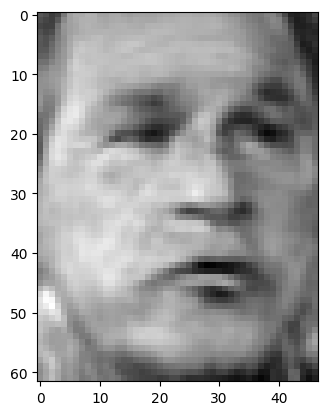

In [87]:
plt.imshow(Xhat[0, :].reshape((h, w)), cmap=plt.cm.gray)

**Comment:** The compression is definitely lossy but the original image is still recognizable and the result acceptable.


### Evaluating different compressions

Use the previous setup to generate compressed images using different values of low dimensions in the PCA algorithm (e.g.: 100, 200, 500, 1000). Plot and comment on the results.


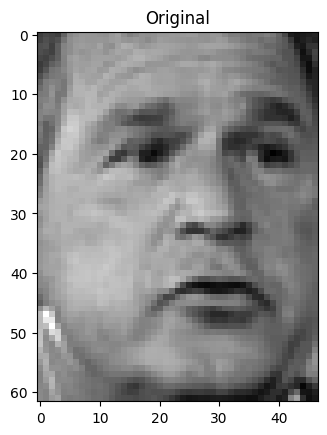

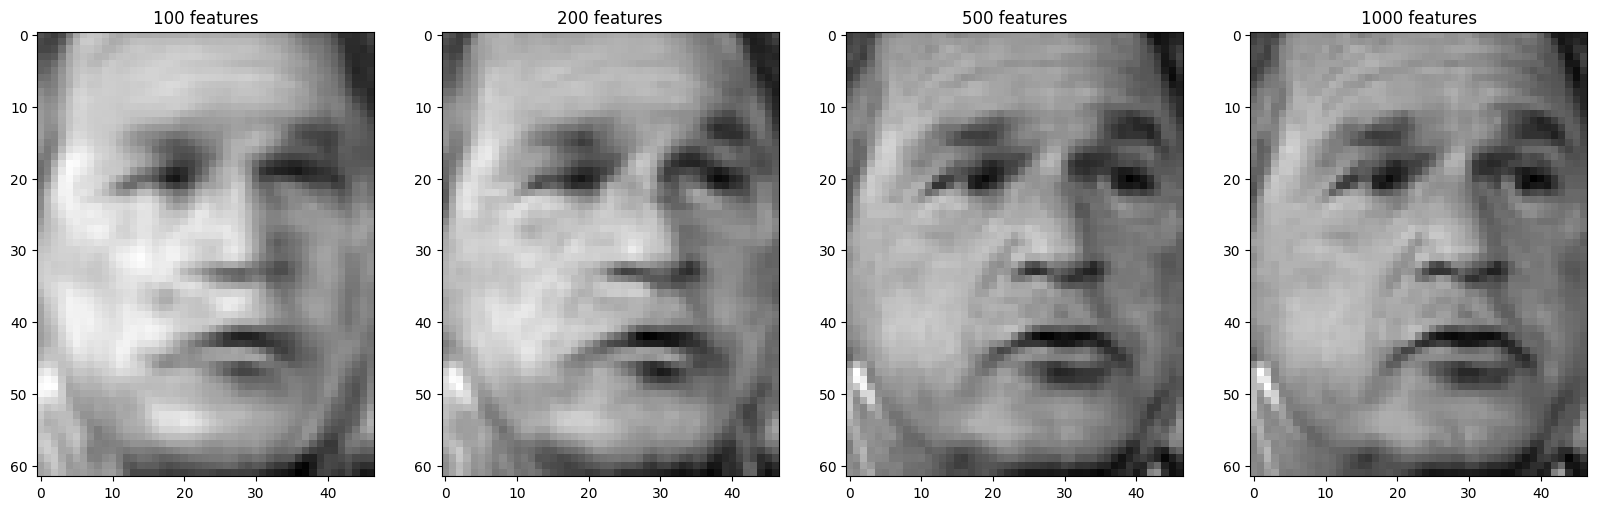

In [88]:
plt.imshow(X[0, :].reshape((h, w)), cmap=plt.cm.gray)
plt.title("Original")
plt.show()

arr = [100, 200, 500, 1000]
fig, axes = plt.subplots(1, len(arr), figsize=(20, 20))

for i in range(len(arr)):
    axes[i].imshow(encode_decode_pca(X, arr[i])[
                   0, :].reshape((h, w)), cmap=plt.cm.gray)
    axes[i].set_title("{} features".format(arr[i]))

plt.show()


**Comment:** We can notice fast improvements when increasing the number of features. The last image is barely distinguishable from the original one while maintaining less than half of the features.


## Master Students: PCA Tuning

If we use PCA for compression or decompression, it may be not trivial to decide how many dimensions to keep. In this section we review a principled way to decide how many dimensions to keep.

The number of dimensions to keep is the only _hyper-parameter_ of PCA. A method designed to decide how many dimensions/eigenvectors is the _proportion of variance_:
$$ \textrm{POV}=\frac{\sum*{i=1}^{m}{\lambda*{i}}}{\sum*{j=1}^{M}{\lambda*{j}}}, $$
where $\lambda$ are eigenvalues, $M$ is the dimensionality of the original data, and $m$ is the chosen lower dimensionality.

Using the $POV$ formula we may select a number $M$ of dimensions/eigenvalues so that the proportion of variance is, for instance, equal to 95%.

Implement a new PCA for encoding and decoding that receives in input not the number of dimensions for projection, but the amount of proportion of variance to be preserved.


In [89]:
def encode_decode_pca_with_pov(A, p):
    """
    Accepts a data matrix A (with N samples and M features) and a floating point
    number p (with 0 < p < 1) denoting the POV to be preserved and returns a tuple
    consisting of the reconstructed data matrix Ahat and the number of dimensions selected m.

    Returns:
        Ahat: [NxM] numpy PCA reconstructed data matrix (N samples, M features)
        m:   integer reporting the number of dimensions selected
    """

    eigval, eigvec = compute_eigenvalue_eigenvectors(
        compute_covariance_matrix(center_data(A))
    )

    cum_var_ratio = np.cumsum(eigval) / np.sum(eigval)
    m = np.argmax(cum_var_ratio >= p) + 1  # add 1 for the case of index 0

    pca_eigvec = sort_eigenvalue_eigenvectors(eigval, eigvec)[1][:, :m]

    # ENCODE
    P = np.dot(pca_eigvec.T, A.T).T

    # DECODE
    Ahat = np.dot(P, pca_eigvec.T) + np.mean(A, axis=0)

    return Ahat, m

Import the _lfw_ dataset using the _get_lfw_data()_ in _syntheticdata_. Use the implemented function to encode and decode the data by projecting on a lower dimensional space such that POV=0.9. Use the function _imshow_ to plot and compare original and reconstructed pictures. Comment on the results.


In [90]:
X, y, h, w = syntheticdata.get_lfw_data()


In [91]:
Xhat, m = encode_decode_pca_with_pov(X, 0.9)


Number of dimensions selected for accuracy of 90%: 81


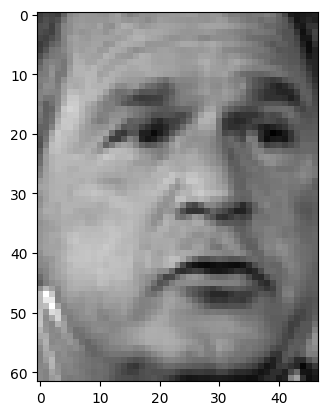

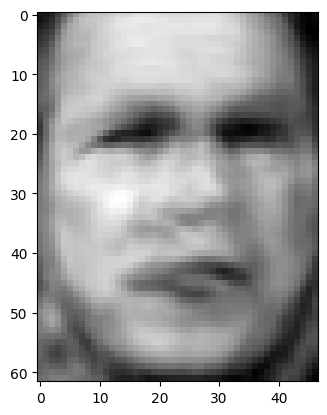

In [92]:
plt.imshow(X[0, :].reshape((h, w)), cmap=plt.cm.gray)
plt.figure()
plt.imshow(Xhat[0, :].reshape((h, w)), cmap=plt.cm.gray)

print("Number of dimensions selected for accuracy of {}%: {}".format(90, m))


**Comment:** We need a surprisingly small number of dimension to preserve 90% of the variance but the result is very bad, we need a way higher value to produce a good result.


Number of dimensions selected for accuracy of 95%: 152


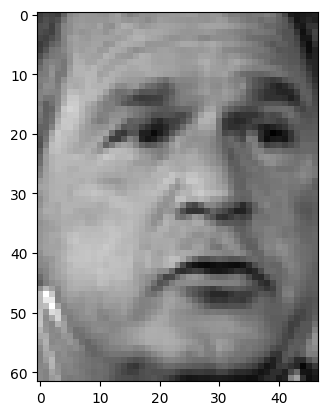

In [93]:
Xhat, m = encode_decode_pca_with_pov(X, 0.95)

print("Number of dimensions selected for accuracy of {}%: {}".format(95, m))
plt.imshow(X[0, :].reshape((h, w)), cmap=plt.cm.gray)
plt.show()


**Comment:** To retain 95% accuracy we just need 150 dimensions and the result is definitely better, granted we are doubling the number of features only to increase the accuracy by 5% so in a context different than image compression it might not be worth it.


# K-Means Clustering (Bachelor and master students)

In this section you will use the _k-means clustering_ algorithm to perform unsupervised clustering. Then you will perform a qualitative assesment of the results.


### Importing scikit-learn library

We start importing the module _cluster.KMeans_ from the standard machine learning library _scikit-learn_.


In [94]:
from sklearn.cluster import KMeans

### Loading the data

We will use once again the _iris_ data set. The function _get_iris_data()_ from the module _syntethicdata_ returns the _iris_ dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].


In [95]:
X, y = syntheticdata.get_iris_data()


### Projecting the data using PCA

To allow for visualization, we project our data in two dimensions as we did previously. This step is not necessary, and we may want to try to use _k-means_ later without the PCA pre-processing. However, we use PCA, as this will allow for an easy visualization.


In [96]:
_, P = pca(X, 2)


### Running k-means

We will now consider the _iris_ data set as an unlabeled set, and perform clustering to this unlabeled set. We can compare the results of the clustering to the lableled calsses.

Use the class _KMeans_ to fit and predict the output of the _k-means_ algorithm on the projected data. Run the algorithm using the following values of $k=\{2,3,4,5\}$.


In [97]:
K_RANGE = range(2, 6)


In [98]:
yhat = {}

for k in K_RANGE:
    yhat[k] = KMeans(n_clusters=k, n_init="auto").fit_predict(P)


### Qualitative assessment

Plot the results of running the k-means algorithm, compare with the true labels, and comment.


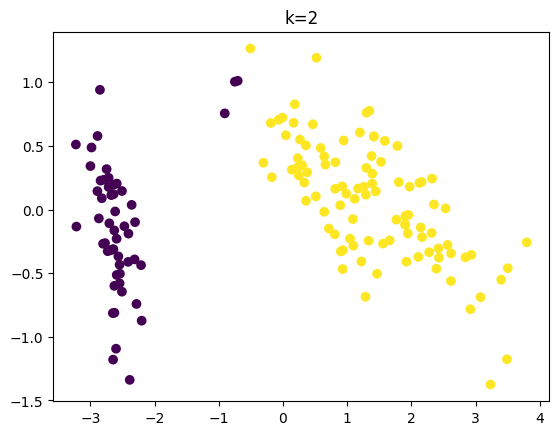

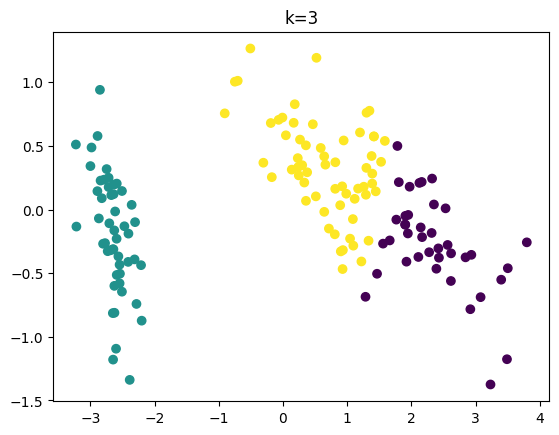

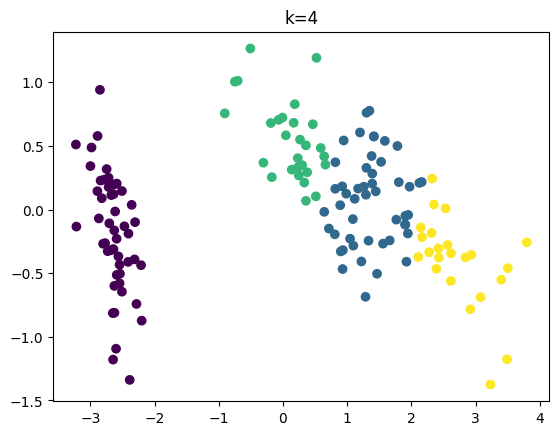

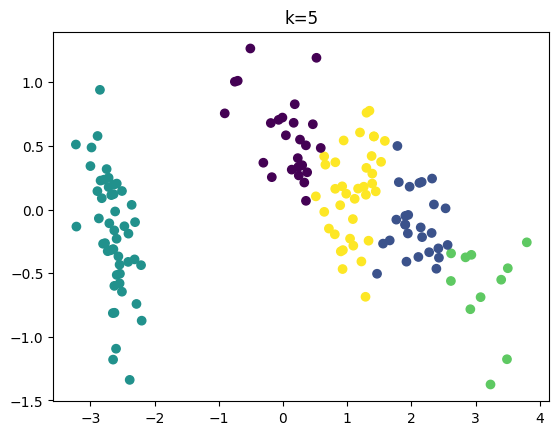

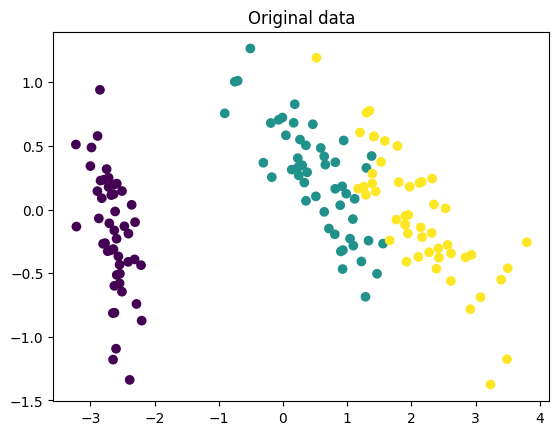

In [99]:
for k in K_RANGE:
    plt.scatter(P[:, 0], P[:, 1], c=yhat[k])
    plt.title(f"k={k}")
    plt.show()

plt.scatter(P[:, 0], P[:, 1], c=y)
plt.title("Original data")
plt.show()


**Comment:** The accuracy of the prediction with 3 classes is quite good.


# Quantitative Assessment of K-Means (Bachelor and master students)

We used k-means for clustering and we assessed the results qualitatively by visualizing them. However, we often want to be able to measure in a quantitative way how good the clustering was. To do this, we will use a classification task to evaluate numerically the goodness of the representation learned via k-means.

Reload the _iris_ dataset. Import a standard `LogisticRegression` classifier from the module `sklearn.linear_model`. Use the k-means representations learned previously (`yhat2,...,yhat5`) and the true label to train the classifier. Evaluate your model on the training data (we do not have a test set, so this procedure will assess the model fit instead of generalization) using the `accuracy_score()` function from the _sklearn.metrics_ module. Plot a graph showing how the accuracy score varies when changing the value of k. Comment on the results.


- Train a Logistic regression model using the first two dimensions of the PCA of the iris data set as input, and the true classes as targets.
- Report the model fit/accuracy on the training set.
- For each value of K:
  - One-Hot-Encode the classes output by the K-means algorithm.
  - Train a Logistic regression model on the K-means classes as input vs the real classes as targets.
  - Calculate model fit/accuracy vs. value of K.
- Plot your results in a graph and comment on the K-means fit.


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X, y = syntheticdata.get_iris_data()

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X[:, :2], y)

print("Accuracy: {}".format(log_reg.score(X[:, :2], y)))


Accuracy: 0.82


With k=2 we have an accuracy of 0.6666666666666666
With k=3 we have an accuracy of 0.8866666666666667
With k=4 we have an accuracy of 0.84
With k=5 we have an accuracy of 0.8933333333333333


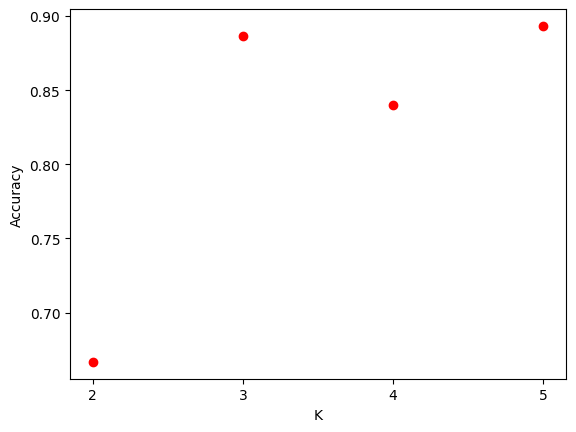

In [101]:
from sklearn.preprocessing import OneHotEncoder

log_reg = LogisticRegression(
    max_iter=1000, multi_class="ovr", solver="newton-cholesky")
yhat_ohe = {}

plt.ylabel("Accuracy")
plt.xlabel("K")
plt.xticks(K_RANGE)

enc = OneHotEncoder()

for k in K_RANGE:
    yhat_ohe[k] = enc.fit_transform(yhat[k].reshape(-1, 1))

    log_reg.fit(yhat_ohe[k], y)

    accu = metrics.accuracy_score(y, log_reg.predict(yhat_ohe[k]))
    print(f"With k={k} we have an accuracy of {accu}")
    plt.plot(k, accu, "ro")

plt.show()


**Comment:** We get the highest accuracy with K=3


# Conclusions

In this notebook we studied **unsupervised learning** considering two important and representative algorithms: **PCA** and **k-means**.

First, we implemented the PCA algorithm step by step; we then run the algorithm on synthetic data in order to see its working and evaluate when it may make sense to use it and when not. We then considered two typical uses of PCA: for **visualization** on the _iris_ dataset, and for **compression-decompression** on the _lfw_ dateset.

We then moved to consider the k-means algorithm. In this case we used the implementation provided by _scikit-learn_ and we applied it to another prototypical unsupervised learning problem: **clustering**; we used _k-means_ to process the _iris_ dataset and we evaluated the results visually.

In the final part, we considered two additional questions that may arise when using the above algorithms. For PCA, we considered the problem of **selection of hyper-parameters**, that is, how we can select the hyper-parameter of ou algorithm in a reasonable fashion. For k-means, we considered the problem of the **quantitative evaluation** of our results, that is, how can we measure the performance or usefulness of our algorithms.
